In [4]:
import jax
import jax.numpy as jnp
import jax.random as jrandom

import timeit

import matplotlib.pyplot as plt

In [ ]:
# Define a key
key = jrandom.PRNGKey(0)

# Make a poisson draw
key, subkey = jrandom.split(key)
draw = jrandom.poisson(subkey, 5.0, shape=(1000,2000))

binomial_draw = jrandom.binomial(subkey, 5, 0.8, shape=(2000,2000))

%timeit  jrandom.poisson(key, binomial_draw).block_until_ready()


3.85 s ± 138 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.05 s ± 132 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


<class 'int'> 183


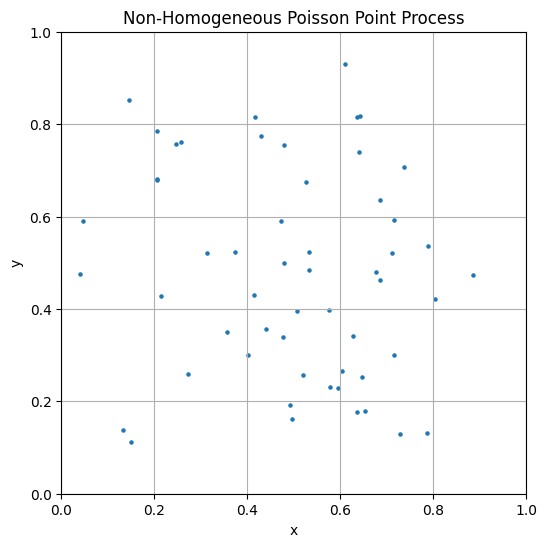

In [30]:
# 1. Define domain
x_min, x_max = 0, 1
y_min, y_max = 0, 1


# Define a random key
key = jax.random.PRNGKey(123)
subkey, key = jrandom.split(key)


# 2. Define the population density function λ(x, y)
def lambda_density(x, y):
    # Example: peak at the center (Gaussian-like)
    return 200 * jnp.exp(-10 * ((x - 0.5)**2 + (y - 0.5)**2))

# 3. Find maximum density (safe upper bound)
lambda_max = 200  # we know this is the maximum from the function

# 4. Simulate a homogeneous PPP with intensity λ_max
area_total = (x_max - x_min) * (y_max - y_min)
n_points = jax.random.poisson(key, lambda_max * area_total).item()
print(type(n_points), n_points)

subkey, key = jrandom.split(key)

# Generate uniformly random points
x_points = jax.random.uniform(key, n_points, minval=x_min, maxval=x_max)

subkey, key = jrandom.split(key)

y_points = jax.random.uniform(key,  n_points, minval=y_min, maxval=y_max)

subkey, key = jrandom.split(key)

# 5. Thinning: keep points with probability λ(x, y) / λ_max
keep_prob = lambda_density(x_points, y_points) / lambda_max
uniform_random = jax.random.uniform(key,n_points, float, 0, 1)

# Keep points where uniform_random < keep_prob
kept_indices = uniform_random < keep_prob
x_kept = x_points[kept_indices]
y_kept = y_points[kept_indices]

# 6. Plot the result
plt.figure(figsize=(6,6))
plt.scatter(x_kept, y_kept, s=5)
plt.title('Non-Homogeneous Poisson Point Process')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.grid(True)
plt.show()
